In [59]:
################################################################################################################################

In [60]:
################################################################################################################################

In [61]:
################################################################################################################################

##### Get current working directory
import os
print(os.getcwd())

##### Set the working directory
os.chdir("c:/Ptest") 
os.getcwd()

In [63]:
##### 1. Load text and convert it into a list or a text string 

In [7]:
import pandas as pd
df_0 = pd.read_csv(r'C:\Users\Alok\Google Drive\Analytics\Github\TextMining\TextMining\Customer_comment.csv')
#df_0 = pd.read_csv('problem_edbbranch.csv','encoding=UTF-8')  
#text = 'BMO is not very flexible with the needs for customers.'
print(df_0.shape)
print(df_0.head(3)) #df['problem'].head()  #Alternatively, df['problem'][:5]
print(df_0.columns)


## Create a dataframe with column names
#df = pd.DataFrame(data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
#df.to_csv('data.csv')   #To save the dataframe as csv in the working directory
#df.to_csv(file_name, sep='\t', encoding='utf-8')

## Save the dataframe output into a csv file
#df_output = pd.DataFrame(word_freq, columns = ['word', 'frequency'])

(63, 1)
                              Customer_comment
0                          Friendly employees 
1  Friendly bank personnel.Good banking hours.
2              service and interest rate on cd
Index(['Customer_comment'], dtype='object')


In [9]:
df=df_0

In [8]:
##### 2. Subset rows and columns and rename columns

In [9]:
# Subset rows
#df_1= df_0[(df_0['rnpsTYPE'] == 'Personal') & (df_0['NPS Group'] == 'Detractor')]
#df_1.shape

# When selecting Detractors only
# select_detractor = df_renamed_columns.loc[df_renamed_columns == 'Detractor']

(25, 3)

In [11]:
################################################################################################################################
##### 3. Briefly look at the text data initially 

In [10]:
### Number of Words -The basic intuition behind this is that generally, the negative sentiments contain a lesser amount of words than the positive ones.

# using apply function to create a new column 
df['word_count'] = df['Customer_comment'].apply(lambda x: len(str(x).split(" "))) 

print(df.columns)
df.head(3)

#df.describe()
#df['reason'][:5]                   # Alternatively, df['reason'].head(5)

Index(['Customer_comment', 'word_count'], dtype='object')


,Customer_comment,word_count
0,Friendly employees,3
1,Friendly bank personnel.Good banking hours.,5
2,service and interest rate on cd,6


In [14]:
################################################################################################################################
##### 4. Convert a column of a dataframe into a list variable

In [24]:
# Convert a column of a dataframe into a list variable
list_text = df['Customer_comment'].tolist()
#print(list_text[:10]) # print upto 10 elements separated by ,

KeyError: 'Customer_comment'

In [12]:
# Convert the list into string type
str_text =''.join(list_text)
print(str_text[:1000])  # print upto 500 letters

Friendly employees Friendly bank personnel.Good banking hours.service and interest rate on cdfriendly staff and very accommodatingNo problems with my accounts.Even when my information was compromised.Excellent service Friendly and knowledgeable employees.convience of many locations for bankingfriendly helpful workers, usually can talk to a person about issuesConvenient Wonderful service. Friendly serviceReal friendly service and convenient. the online banking website stinksGreat customer service experience every time Lack of tellers, on site personnel Staff are friendly and helpful.When you call them they respond to your concerns or complaints positively.Not having a business option for pay appAlways friendly staff but lines are sometimes longer than expectedCustomer service and knowledge of the non-profit status of the organizationCustomer serviceService on the bank by the clercksBig enough to do sizable deals. Customer servicestaff is excellent!Helping me with any problems I had with

In [13]:
################################################################################################################################
##### 5. Preprocess text or text string

import re     

# Make words lower-case
str_text = str_text.lower()                        
#print(str_text[10:1000])

## Remove numbers
str_text = re.sub(r'\d+','',str_text)    #str_text = ''.join(c for c in str_text if not c.isdigit())  # Remove numbers

"""
# Remove number of numerics
df['numerics'] = df['reason'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['problem','numerics']].head()
"""

# Remove brackets (if any) and anything inside it
#str_text = re.sub("[\[].*?[\]]", "", str_text)        

# Remove special characters except spaces and dots
str_text = re.sub(r"[^a-zA-Z0-9.]+", ' ', str_text)   
#str_text = re.sub(r'\W', ' ', str_text)                ## Remove all the special characters

## Removing html tags from the text like “<head><body>”
#str_text = re.sub('<[^<]+?>','', str_text)            

# remove all single characters
str_text = re.sub(r'\s+[a-zA-Z]\s+', ' ', str_text)    
#str_text = re.sub(r'\^[a-zA-Z]\s+', ' ', str_text)     ## Remove single characters from the start

# Substituting multiple spaces with single space
str_text = re.sub(r'\s+', ' ', str_text, flags=re.I)   

#str_text = re.sub(r'^b\s+', '', str_text)              ## Removing prefixed 'b'             

# Remove punctuation from the text like “.?!” and also the symbols like “@#$”
from string import punctuation                  

def strip_punctuation(str_text):
    return ''.join(c for c in str_text if c not in punctuation)

str_text = strip_punctuation(str_text)

print(str_text[:1000])


"""
# Spelling correction using the textblob library - enable  us to reduce multiple copies of words though time-consuming

from textblob import TextBlob
str_text = TextBlob(str_text)
str_text.correct()
print(str_text[:1000])
"""


##### Apply stopwords - Remove irrelevant words using nltk stop words from the sentences as they don’t carry any information.
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer        #is based on The Porter Stemming Algorithm
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer             #is based on The Porter Stemming Algorithm

from textblob import TextBlob
#from autocorrect import spell                 #spell check


stop_words = set(stopwords.words('english'))  #print(type(stop_words)): set
## remove additional words by using the attribute   .update([]) from the document
stop_words.update(['nan','also','get','please','go','mos','fully','anyone','every','told','nd','getting','wa','bmo','dont',
                  'account','bank','call','ha','back'])

wordnet_lemmatizer = WordNetLemmatizer()        #lemmatizing so as to get its root form eg: functions,funtionality as function
snowball_stemmer = SnowballStemmer('english')   #stemming

# Tokenizing words by breanking the sentences into a list of words - alternatively, listed_text = str_text.split(" ")  
word_tokens = nltk.word_tokenize(str_text)         

#lemmatizing
word_tokens_lem= [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]  

#stemming
word_tokens_stem= [snowball_stemmer.stem(word) for word in word_tokens_lem]   
word_list = [w for w in word_tokens_stem if not w in stop_words]
print(word_list[:100])


"""
# To display all unique words in the text: Bag of Words
vocab_bow = freqDist.keys()
print(len(vocab_bow))
print(vocab_bow)
"""

"""
################################################################################################################################
# Bag of Words - (BoW) refers to the representation of text which describes the presence of words within the text data. 
#  The intuition behind this is that two similar text fields will contain similar kind of words, 
# and will therefore have a similar bag of words. 
# Further, that from the text alone we can learn something about the meaning of the document.

#For implementation, sklearn provides a separate function for it as shown below:

from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
#df_bow = bow.fit_transform(df['reason'])
df_bow = bow.fit_transform(word_list)
df_bow[1:19]
#type(df_bow)
#> <31962x1000 sparse matrix of type '<class 'numpy.int64'>'
# with 128380 stored elements in Compressed Sparse Row format>
"""

friendly employees friendly bank personnelgood banking hoursservice and interest rate on cdfriendly staff and very accommodatingno problems with my accountseven when my information was compromisedexcellent service friendly and knowledgeable employeesconvience of many locations for bankingfriendly helpful workers usually can talk to person about issuesconvenient wonderful service friendly servicereal friendly service and convenient the online banking website stinksgreat customer service experience every time lack of tellers on site personnel staff are friendly and helpfulwhen you call them they respond to your concerns or complaints positivelynot having business option for pay appalways friendly staff but lines are sometimes longer than expectedcustomer service and knowledge of the non profit status of the organizationcustomer serviceservice on the bank by the clercksbig enough to do sizable deals customer servicestaff is excellent helping me with any problems had with the bmo online ba

'\n################################################################################################################################\n# Bag of Words - (BoW) refers to the representation of text which describes the presence of words within the text data. \n#  The intuition behind this is that two similar text fields will contain similar kind of words, \n# and will therefore have a similar bag of words. \n# Further, that from the text alone we can learn something about the meaning of the document.\n\n#For implementation, sklearn provides a separate function for it as shown below:\n\nfrom sklearn.feature_extraction.text import CountVectorizer\nbow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")\n#df_bow = bow.fit_transform(df[\'reason\'])\ndf_bow = bow.fit_transform(word_list)\ndf_bow[1:19]\n#type(df_bow)\n#> <31962x1000 sparse matrix of type \'<class \'numpy.int64\'>\'\n# with 128380 stored elements in Compressed Sparse Row format>\n'

In [14]:
################################################################################################################################
##### 6. Frequency count of each unique word in the text document (string)

##### (1) Absolute Frequency Count of each unique word - record the frequency of each word type in a text document (string) tokenized. 
from nltk import FreqDist
fd = nltk.FreqDist(word_list) #FreqDist with 3493 samples and 20527 outcomes>
print(fd)

freqDist = FreqDist(word_list)
print('Absolute Frequency Count of Word:\n')
print(freqDist.tabulate(100))  #freqDist.freq            #<class 'NoneType'>  

# Alternative way of generating absoute frequency count of word: c = Counter(word_list)


import pandas as pd 
# Create Data Frame using pandas library. .value_counts() counts the number of occurrences of particular word or observation .
afc=pd.Series(word_list).value_counts() #afc[:100]

print('Absolute Frequency Count of Word:',afc) #afc[:100])
print('Length of word_list:',len(word_list))

##### (2) Relative Frequency Count of Word
import pandas as pd 
rfc=pd.Series(word_list).value_counts() / len(word_list)

# Merge two series using pandas. concat()
df_f = pd.concat([afc,rfc], axis=1) #merge `a_series` and `another_series`
print(df_f.head(100))


<FreqDist with 226 samples and 311 outcomes>
Absolute Frequency Count of Word:

            friend             servic              staff              onlin             experi               time               veri            problem           knowledg               mani               help             person             custom               busi               line               deal            support               like               last              month               year              locat               lack            concern             enough             sizabl              start              whose             client             extend             period         profession              peopl              offic           transact                old              could               date               give             realli                use              charg               mail                abl          difficult                one              never            employe      per

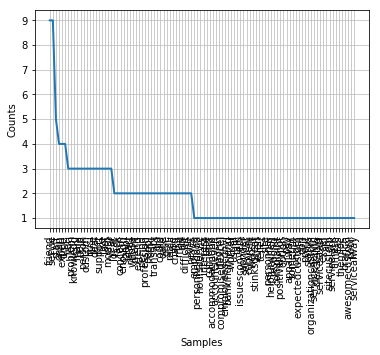

In [16]:
# Plotting the frequency count of words
freqDist = FreqDist(word_list)
freqDist.plot(100)    


In [58]:
"""
from textblob import TextBlob

# TO find out how many times a particular word is mentioned in the text:
customercomments = TextBlob(str_text)
#print(customercomments.words.count('customer'))
print(customercomments.words.count('account', case_sensitive=False))
"""

"\nfrom textblob import TextBlob\n\n# TO find out how many times a particular word is mentioned in the text:\ncustomercomments = TextBlob(str_text)\n#print(customercomments.words.count('customer'))\nprint(customercomments.words.count('account', case_sensitive=False))\n"

In [20]:
text=str_text

In [21]:
################################################################################################################################
##### 7. Word association using text document (string) - working on 2/28

import re

from nltk.corpus import stopwords
import nltk

stop_words = stopwords.words('english')

desirable_tags = ['NN'] # We want only nouns - can also add 'NNP', 'NNS', 'NNPS' if needed, depending on the results

word_list = []

for sent in text.split('.'):
    for word in sent.split():
        '''
        Extract the unique, non-stopword nouns only
        '''
        if word not in word_list and word not in stop_words and nltk.pos_tag([word])[0][1] in desirable_tags:
            word_list.append(word)



'''
Construct the association matrix, where we count 2 words as being associated if they appear in the same sentence.

Later, I'm going to define associations more properly by introducing a 
window size (say, if 2 words seperated by at most 5 words in a sentence, 
then we consider them to be associated)
'''

import numpy as np
import pandas as pd

table = np.zeros((len(word_list),len(word_list)), dtype=int)

for sent in text.split('.'):
    for i in range(len(word_list)):
        for j in range(len(word_list)):
            if word_list[i] in sent and word_list[j] in sent:
                table[i,j]+=1

df = pd.DataFrame(table, columns=word_list, index=word_list)



### Count the number of occurrences of each word in word_list

all_words = pd.DataFrame(np.zeros((len(df), 2)), columns=['Word', 'Count'])
all_words.Word = df.index

for sent in text.split('.'):
    count=0
    for word in sent.split():
        if word in word_list:
            all_words.loc[all_words.Word==word,'Count'] += 1



### Sort the word pairs in decreasing order of their association strengths

df.values[np.triu_indices_from(df, 0)] = 0 # Make the upper triangle values 0

assoc_df = pd.DataFrame(columns=['Word 1', 'Word 2', 'Association Strength (Word 1 -> Word 2)'])
for row_word in df:
    for col_word in df:
        '''
        If Word1 occurs 10 times in the text, and Word1 & Word2 occur in the same sentence 3 times,
        the association strength of Word1 and Word2 is 3/10 - Please correct me if this is wrong.
        '''
        assoc_df = assoc_df.append({'Word 1': row_word, 'Word 2': col_word, 
                                        'Association Strength (Word 1 -> Word 2)': df[row_word][col_word]/all_words[all_words.Word==row_word]['Count'].values[0]}, ignore_index=True)


word_association_output = assoc_df.sort_values(by='Association Strength (Word 1 -> Word 2)', ascending=False)
print('word_association_output:\n',word_association_output[:200])

word_association_output:
              Word 1           Word 2  Association Strength (Word 1 -> Word 2)
5237         profit              cut                                      1.0
12249         loani           chosen                                      1.0
6262   sitecustomer  professionalism                                      1.0
6261   sitecustomer          timethe                                      1.0
6260   sitecustomer           period                                      1.0
6259   sitecustomer            start                                      1.0
6258   sitecustomer          support                                      1.0
6257   sitecustomer      servicelack                                      1.0
12241         loani              use                                      1.0
12242         loani          awesome                                      1.0
12243         loani        ratingbad                                      1.0
12244         loani           charge  

In [22]:
################################################################################################################################
# 8. N-gram - unigrams, bigrams, trigrams,...,N-grams(N)

# N-grams - The basic principle behind n-grams is that they capture the language structure, 
#like what letter or word is likely to follow the given one. 
#The longer the n-gram (the higher the n), the more context you have to work with. 
#Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. 
#On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

# Extract bigrams from the text using the ngrams function of the textblob library.
#grams = TextBlob(df['problem'][50]).ngrams(2)

#str_text_gram =''.join(word_list)
#type(str_text_gram)

from textblob import TextBlob
bigrams = TextBlob(str_text).ngrams(2)  #bigrams is a list
print('Bigrams:\n',bigrams[:10])

trigrams = TextBlob(str_text).ngrams(3)  
print('Trigrams:\n',trigrams[:20])

#quadrograms = TextBlob(str_text).ngrams(4)  
#print('Quadrograms:\n',quadrograms[:20])

Bigrams:
 [WordList(['friendly', 'employees']), WordList(['employees', 'friendly']), WordList(['friendly', 'bank']), WordList(['bank', 'personnelgood']), WordList(['personnelgood', 'banking']), WordList(['banking', 'hoursservice']), WordList(['hoursservice', 'and']), WordList(['and', 'interest']), WordList(['interest', 'rate']), WordList(['rate', 'on'])]
Trigrams:
 [WordList(['friendly', 'employees', 'friendly']), WordList(['employees', 'friendly', 'bank']), WordList(['friendly', 'bank', 'personnelgood']), WordList(['bank', 'personnelgood', 'banking']), WordList(['personnelgood', 'banking', 'hoursservice']), WordList(['banking', 'hoursservice', 'and']), WordList(['hoursservice', 'and', 'interest']), WordList(['and', 'interest', 'rate']), WordList(['interest', 'rate', 'on']), WordList(['rate', 'on', 'cdfriendly']), WordList(['on', 'cdfriendly', 'staff']), WordList(['cdfriendly', 'staff', 'and']), WordList(['staff', 'and', 'very']), WordList(['and', 'very', 'accommodatingno']), WordList(

In [34]:
df=df_0

In [84]:
# Tokenization - Divide the text into a sequence of words or sentences 
# The textblob library is used to first transform the text into a blob and then convert them into a series of words.

#Tokenize the text
#TextBlob(str_text).words  
#TextBlob(str_text[:100]).words

In [41]:
################################################################################################################################
# 9. Term frequency (TF) -  the ratio of the count of a word present in a sentence, to the length of the sentence
#    Inverse Document Frequency (IDF)- The intuition is that a word is not much of use if it appears in all the documents.

##### (1) TF = (Number of times term T appears in the particular row) / (number of terms in that row)

tf1 = (df['Customer_comment'][1:10]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']  #pandas.core.frame.DataFrame
#print(tf1.head(10))

##### (2) IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.
#              The IDF of each word is the log of the ratio of the total number of rows to the number of rows    

import numpy as np
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['Customer_comment'].str.contains(word)])))

#print(tf1.head(10))

# (3) TF-IDF (Term Frequency – Inverse Document Frequency) is the multiplication of the TF and IDF calculated above and 
#           indicates how important a term is relative to a document and to a corpus, a collection of documents. 

tf1['tfidf'] = tf1['tf'] * tf1['idf']
print(tf1.head(10))

"""
The more common the word across documents, the lower its score and 
the more unique a word is to our first document, the higher the score. 
"""


           words   tf       idf     tfidf
0                 2.0  0.000000  0.000000
1     Convenient  1.0  4.143135  4.143135
2      Excellent  1.0  4.143135  4.143135
3       Friendly  2.0  2.756840  5.513681
4             No  1.0  2.197225  2.197225
5              a  1.0  0.154151  0.154151
6          about  1.0  4.143135  4.143135
7  accommodating  1.0  4.143135  4.143135
8  accounts.Even  1.0  4.143135  4.143135
9            and  3.0  1.435085  4.305254


'\nThe more common the word across documents, the lower its score and \nthe more unique a word is to our first document, the higher the score. \n'

In [36]:
#tf1.head(10)

,words,tf,idf,tfidf
0,,2.0,0.000000,0.000000
1,Convenient,1.0,4.143135,4.143135
2,Excellent,1.0,4.143135,4.143135
3,Friendly,2.0,2.756840,5.513681
4,No,1.0,2.197225,2.197225
5,a,1.0,0.154151,0.154151
6,about,1.0,4.143135,4.143135
7,accommodating,1.0,4.143135,4.143135
8,accounts.Even,1.0,4.143135,4.143135
9,and,3.0,1.435085,4.305254


In [43]:
################################################################################################################################
# 10.Sentiment Analysis - Detect the sentiment of the problem using the textblob library
"""
# It returns a tuple representing polarity and subjectivity of each problem below. 
df['reason'][:5].apply(lambda x: TextBlob(x).sentiment)
#df['reason'][1:10].apply(lambda x: TextBlob(x).sentiment)
"""
from textblob import TextBlob
# Only polarity is extracted as it indicates the sentiment: 1 means a positive sentiment and values nearer to -1 means a negative sentiment. 
df['sentiment'] = df['Customer_comment'].apply(lambda x: TextBlob(x).sentiment[0] )
df[['Customer_comment','sentiment']].head(10)

,Customer_comment,sentiment
0,Friendly employees,0.3750
1,Friendly bank personnel.Good banking hours.,0.3750
2,service and interest rate on cd,0.0000
3,friendly staff and very accommodating,0.2875
4,No problems with my accounts.Even when my info...,0.0000
5,Excellent service,1.0000
6,Friendly and knowledgeable employees.,0.3750
7,convience of many locations for banking,0.5000
8,"friendly helpful workers, usually can talk to ...",0.0625
9,Convenient,0.0000
